实际上，参数的初始化对于保持数值稳定性非常重要，此外，**初始化**方案的选择可以与**非线性激活函数**的选择结合在一起，下面是一些启发式方法。
## 4.8.1 梯度消失和梯度爆炸
### 梯度消失

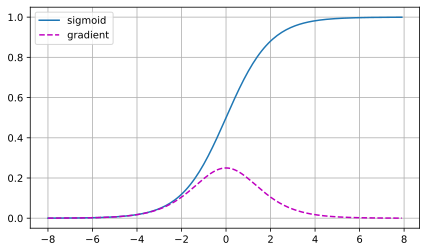

In [10]:
# sigmoid常常导致梯度消失

%matplotlib inline
import torch
from d2l import torch as d2l
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)

y.backward(torch.ones_like(x))
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
legend=['sigmoid', 'gradient'], figsize=(7, 4))


结果是，ReLU已经成为很多默认选择  

### 梯度爆炸
上面关于梯度消失，下面关于梯度爆炸

In [11]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[-1.1185,  1.3372, -0.0328,  0.1434],
        [ 1.8988, -0.5099, -0.1613,  0.4891],
        [ 1.4697,  0.4430, -2.4591,  0.0594],
        [-1.8446, -0.0089,  1.7655,  0.1505]])
乘以100个矩阵后
 tensor([[ 1.0021e+23, -3.5256e+22,  1.5110e+23,  8.9237e+22],
        [ 6.9470e+22, -2.4441e+22,  1.0475e+23,  6.1864e+22],
        [ 4.1350e+23, -1.4548e+23,  6.2349e+23,  3.6823e+23],
        [-3.4745e+23,  1.2224e+23, -5.2389e+23, -3.0941e+23]])


### 打破对称性
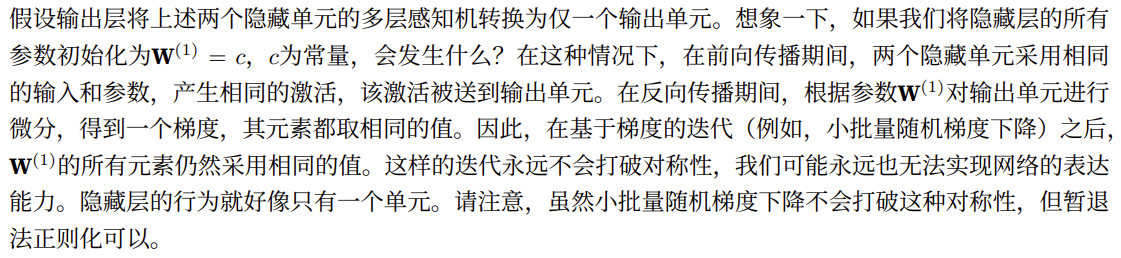
> 我对这段话目前怀疑态度 我感觉似乎，由于样本的多样性，初始化乘完全相同的参数并没有太大影响

## 4.8.2 参数初始化
### 默认初始化
正态分布初始化
### Xavier初始化


> Xiao, L., Bahri, Y., Sohl-Dickstein, J., Schoenholz, S., & Pennington, J. (2018) 的论文，题为 "Dynamical isometry and a mean field theory of CNNs: How to train 10,000-layer vanilla convolutional neural networks"，发表于 International Conference on Machine Learning (pp. 5393–5402)
> 
> 参数初始化一直是深度学习基础研究的热点领域。其中包括专门用于参数绑定（共享）、超分辨率、序列模型和其他情况的启发式算法。

- ReLU 缓解梯度消失问题
- Xavier初始化表明，对于每一层，输出的方差不受输入数量的影响，任何梯度的方差不受输出数量的影响。
- 如果我们知道某些项是发散的，我们能在事后修正吗？看看关于按层自适应速率缩放的论文 (You et al.,2017) 。